In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [3]:
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df = df[df.columns[df.isnull().mean() < 0.8]]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [6]:
df['category'].unique()

array(['Hi-Fi Speakers', 'CD, Disc & Tape Players', 'Wearable Technology',
       'Light Bulbs', 'Bathroom Lighting',
       'Heating, Cooling & Air Quality', 'Coffee & Espresso Machines',
       'Lab & Scientific Products', 'Smart Speakers',
       'Motorbike Clothing', 'Motorbike Accessories',
       'Motorbike Batteries', 'Motorbike Boots & Luggage',
       'Motorbike Chassis', 'Handmade Home & Kitchen Products',
       'Hardware', 'Storage & Home Organisation',
       'Fireplaces, Stoves & Accessories', 'PC Gaming Accessories',
       'USB Gadgets', 'Blank Media Cases & Wallets', 'Car & Motorbike',
       'Boys', 'Sports & Outdoors', 'Microphones', 'String Instruments',
       'Karaoke Equipment', 'PA & Stage',
       'General Music-Making Accessories', 'Wind Instruments',
       'Handmade Gifts', 'Fragrances', 'Calendars & Personal Organisers',
       'Furniture & Lighting', 'Computer Printers', 'Ski Goggles',
       'Snowboards', 'Skiing Poles', 'Downhill Ski Boots',
       'Hiki

In [7]:
frequency_table = df['category'].value_counts()

frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Plugs                                        107
Alexa Built-In Devices                       107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [8]:
top_category = frequency_table.head(5)

In [9]:
# Not sure if the data has to be cleaned or not. It's not clear from the instructions.

<Axes: ylabel='category'>

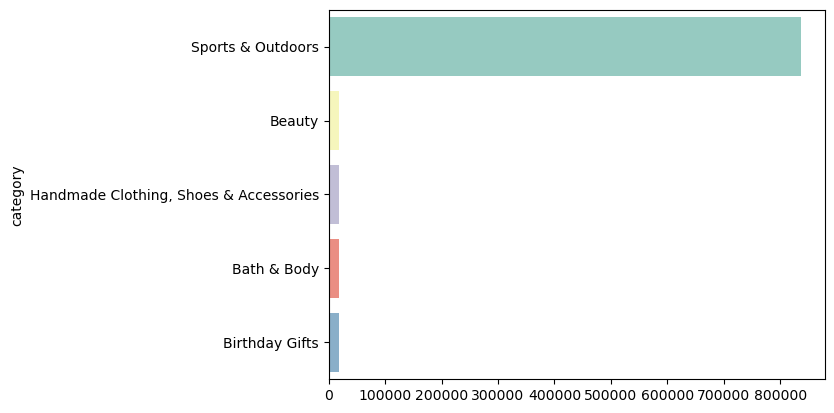

In [10]:
sns.barplot(x=top_category.values, y=top_category.index, palette="Set3")

<Axes: ylabel='count'>

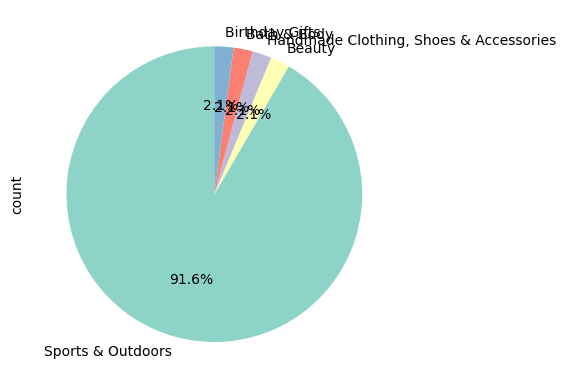

In [11]:
# Sports & Outdoors huge domination in listings
top_category.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

In [12]:
mean_price = df['price'].mean()
mean_price

89.24380943923663

In [13]:
median_price = df['price'].median()
median_price

19.09

In [14]:
mode_price = df['price'].mode()[0]
mode_price

9.99

In [15]:
# Difference of 80 between mean and mode price

In [16]:
var_price = df['price'].var()
var_price

119445.48532256528

In [17]:
std_price = df['price'].std()
std_price

345.60886175352226

In [18]:
min_price = df['price'].min()
min_price

0.0

In [19]:
max_price = df['price'].max()
max_price

100000.0

In [20]:
max_price - min_price

100000.0

In [21]:
# The products are extremely varied in prices. The range, variance and standard deviation all confirm this statement

/Users/kwameantwiadjei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

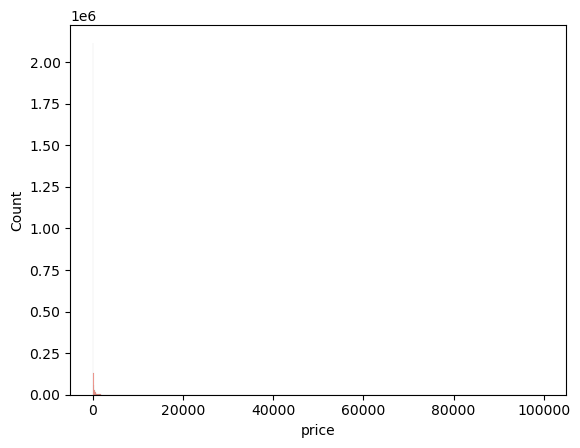

In [26]:
# A lot of prices are on the lower side, but it's very hard to read these diagrams. Cleaning the data and focussing on subsets might 
# help with better analysis. Maybe the histogram itself could be set up better
sns.histplot(df['price'], bins=1000, color="salmon")

<Axes: >

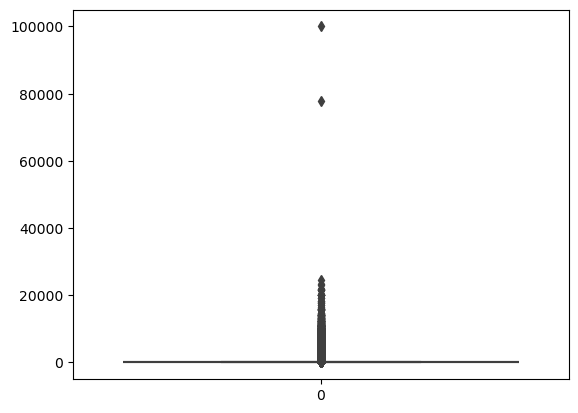

In [27]:
# Some extreme outliers at 80000 and 100000.
sns.boxplot(data = df['price'])

In [28]:
mean_rating = df['stars'].mean()
mean_rating

2.152836472966065

In [29]:
# A lot of products seem to be not rated, because median is 0
median_rating = df['stars'].median()
median_rating

0.0

In [30]:
# Most common rating is zero, hence why median might be 0
mode_rating = df['stars'].mode()[0]
mode_rating

0.0

In [31]:
var_rating = df['stars'].var()
var_rating

4.81743402976196

In [32]:
std_rating = df['stars'].std()
std_rating

2.1948653785054697

In [33]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1
IQR

36.0

In [34]:
# IQR, Var and Std show that there is a wide variation knowing that the median is 0. So ratings are not consistent at all

In [35]:
# The skew of 0.08 shows that it's slightly right skewed
skewness_rating = df['stars'].skew()
skewness_rating

0.08120735761080985

/Users/kwameantwiadjei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

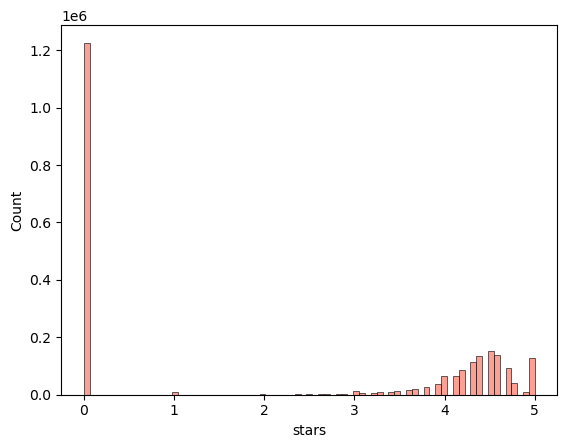

In [36]:
# As seen in the data above, the histogram shows that a lot of products have the ratings 0 (might not be rated at all)
sns.histplot(df['stars'], color="salmon")